In [1]:
# Data manipulation
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Settings
import warnings
warnings.filterwarnings('ignore')

# Display settings
pd.set_option('display.max_columns', None)
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

print("Libraries imported successfully!")

Libraries imported successfully!


In [2]:
# Load the data 
df = pd.read_csv('../data/raw/Crop_recommendation.csv')
print("Dataset loaded successfully!")
print(f"Shape: {df.shape}")
print(f"Rows: {df.shape[0]}, Columns: {df.shape[1]}")

Dataset loaded successfully!
Shape: (2200, 8)
Rows: 2200, Columns: 8


### Initial data exploration

In [3]:
# Display first few rows
print("First 5 rows:")
display(df.head())

print("\n" + "="*50 + "\n")

# Display last few rows
print("Last 5 rows:")
display(df.tail())

First 5 rows:


,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice




Last 5 rows:


,N,P,K,temperature,humidity,ph,rainfall,label
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee
2199,104,18,30,23.603016,60.396475,6.779833,140.937041,coffee


In [4]:
# Get dataset information
print("Dataset Info:")
print("="*50)
df.info()

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [5]:
# checking for missing value 
missing = df.isna().sum()

print(f"{'Column':<20} {'Missing Values':<15}")
print("-" * 50)  # separator line

for col, count in missing.items():
    print(f"{col:<20} {count:<15}")


Column               Missing Values 
--------------------------------------------------
N                    0              
P                    0              
K                    0              
temperature          0              
humidity             0              
ph                   0              
rainfall             0              
label                0              


In [6]:
#checking for duplicate rows
duplicates = df.duplicated().sum()

print(f"Total duplicate rows: {duplicates}")

Total duplicate rows: 0


In [7]:
# Checking number of unique crops and what are they
print(f"Number of unique crops: {df['label'].nunique()}")
print(f"\nCrop types:\n{df['label'].unique()}")

Number of unique crops: 22

Crop types:
['rice' 'maize' 'chickpea' 'kidneybeans' 'pigeonpeas' 'mothbeans'
 'mungbean' 'blackgram' 'lentil' 'pomegranate' 'banana' 'mango' 'grapes'
 'watermelon' 'muskmelon' 'apple' 'orange' 'papaya' 'coconut' 'cotton'
 'jute' 'coffee']


In [8]:
#Distribution of the crops
crops = df['label'].value_counts()
total = df.shape[0]
print(f"{'Crop':<20} {'Total':<15} {'Distribution':<10}")
print("-" * 50)  # separator line

for col, count in crops.items():
    print(f"{col:<20} {count:<15} {(count/total):<.2f}")


Crop                 Total           Distribution
--------------------------------------------------
rice                 100             0.05
maize                100             0.05
jute                 100             0.05
cotton               100             0.05
coconut              100             0.05
papaya               100             0.05
orange               100             0.05
apple                100             0.05
muskmelon            100             0.05
watermelon           100             0.05
grapes               100             0.05
mango                100             0.05
banana               100             0.05
pomegranate          100             0.05
lentil               100             0.05
blackgram            100             0.05
mungbean             100             0.05
mothbeans            100             0.05
pigeonpeas           100             0.05
kidneybeans          100             0.05
chickpea             100             0.05
coffee           

### Numerical Feature Analysis

In [9]:
# Statistical summary
print("Statistical Summary:")
print("="*50)
display(df.describe())

Statistical Summary:


,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


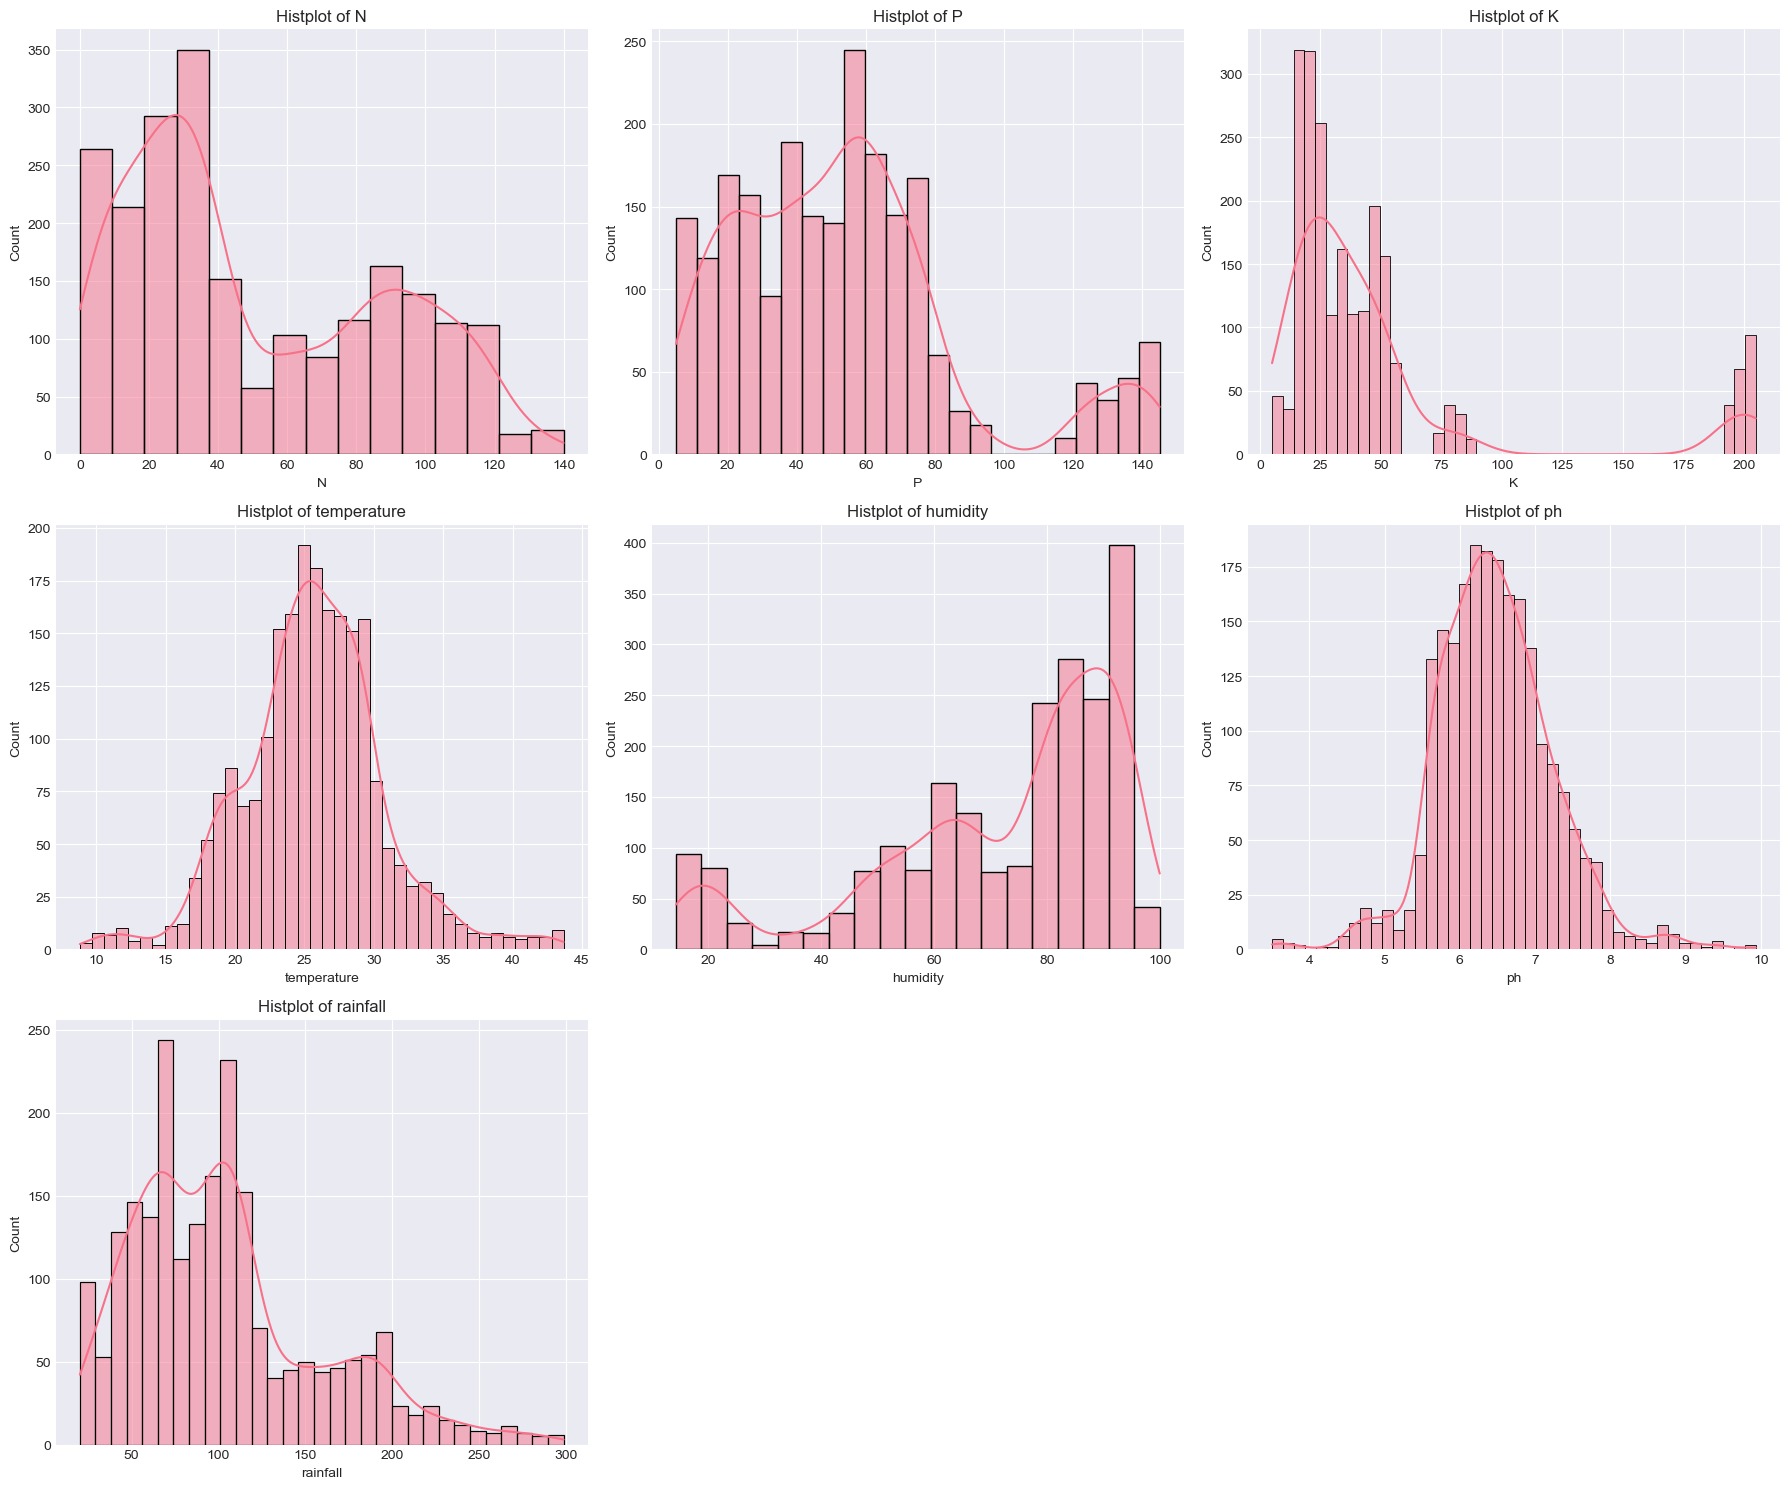

In [10]:
features = ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']
rows = (len(features) // 3) + 1  # 3 plots per row
plt.figure(figsize=(18, 5*rows)) 

for i, col in enumerate(features, 1):
    plt.subplot(rows, 3, i)
    sns.histplot(x=df[col], kde=1)
    plt.title(f'Histplot of {col}')
plt.tight_layout()
plt.show()

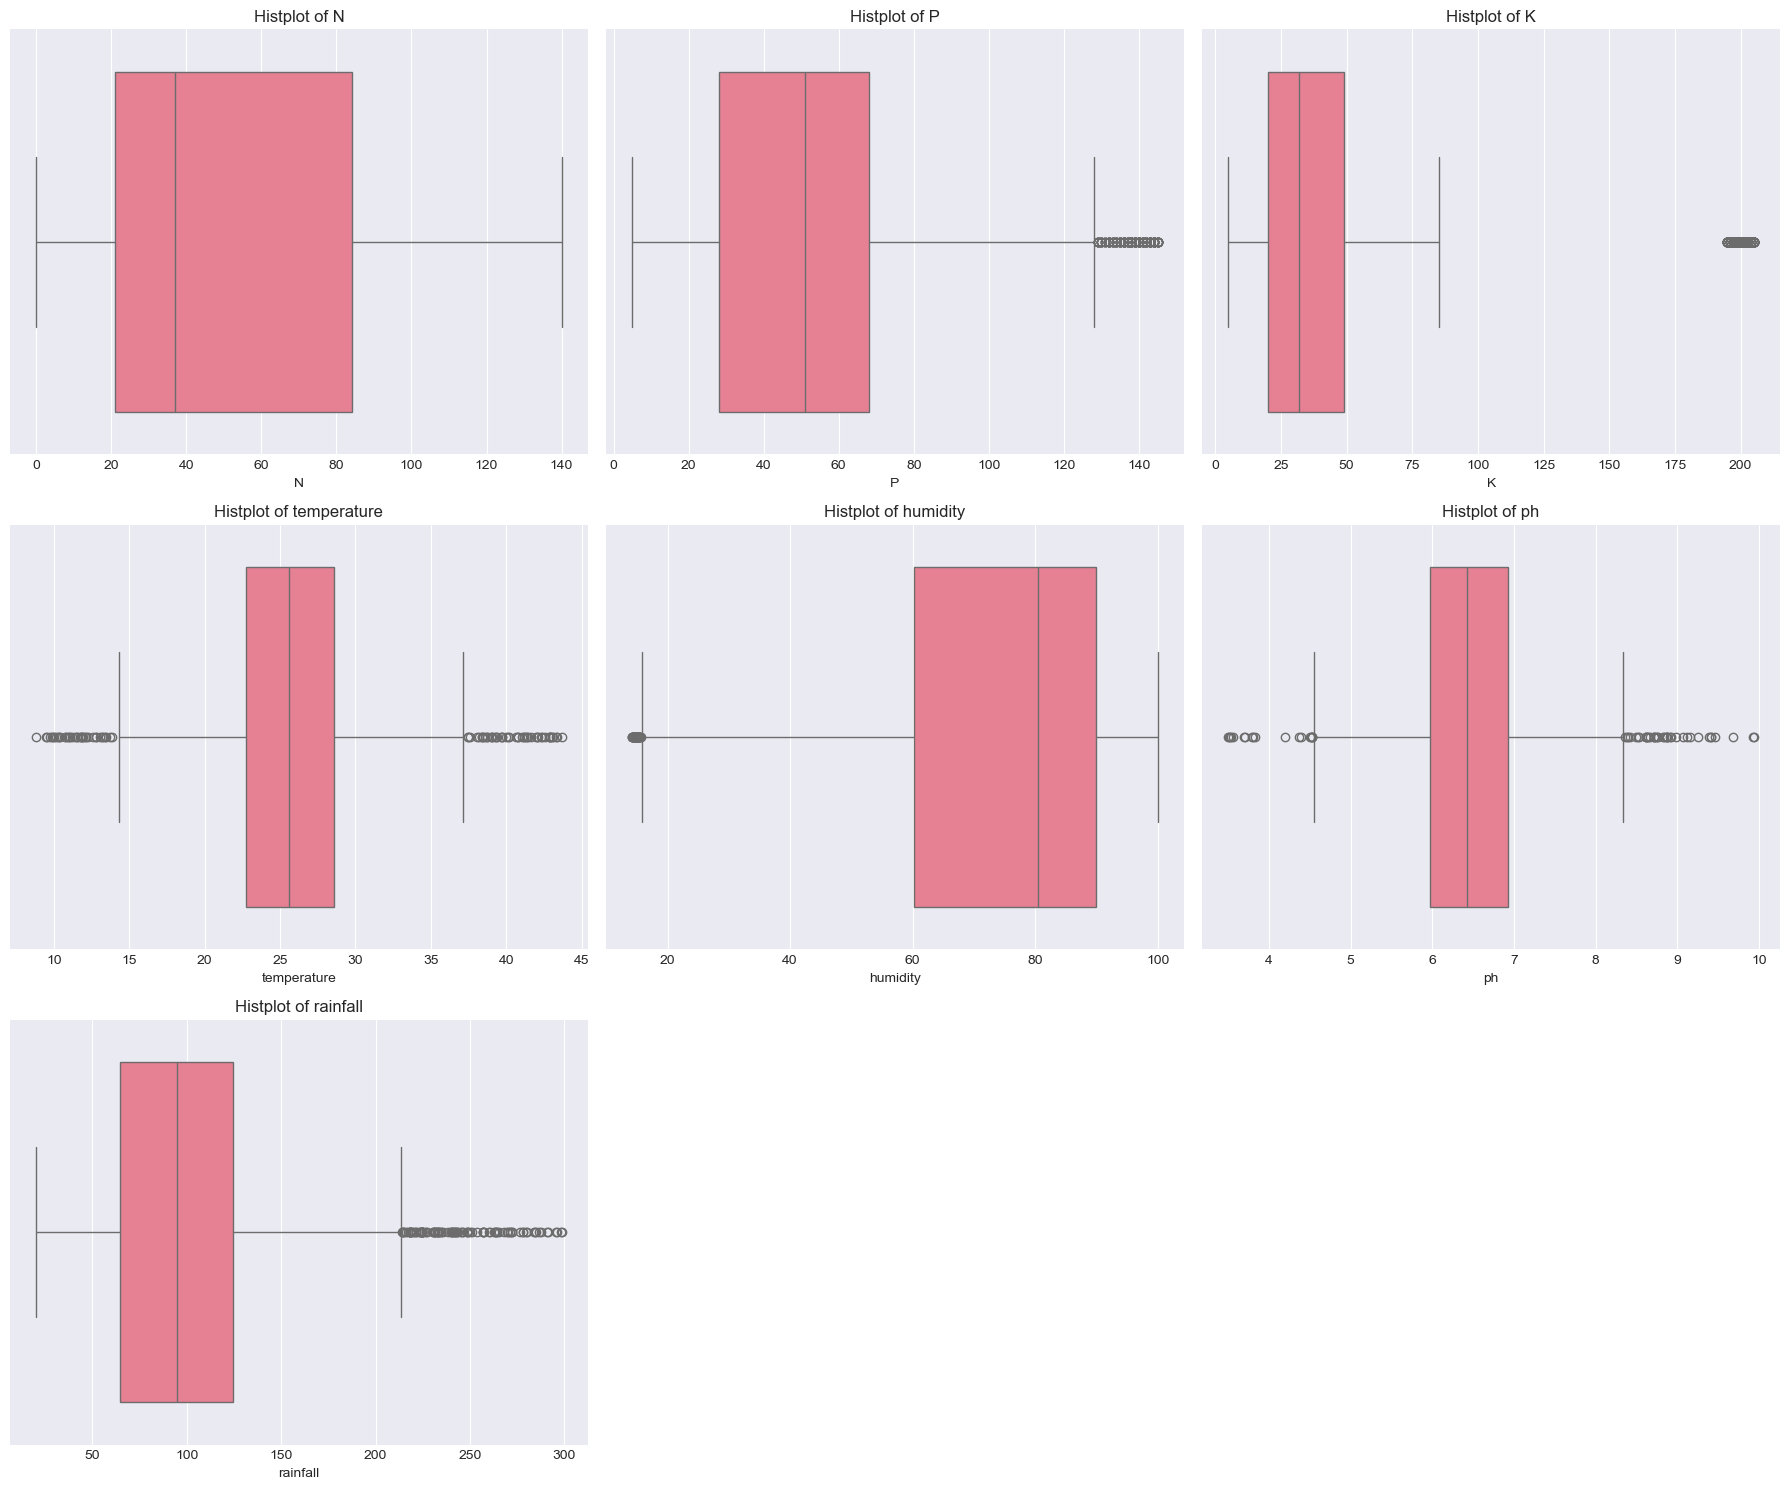

In [11]:
plt.figure(figsize=(18, 5*rows)) 

for i, col in enumerate(features, 1):
    plt.subplot(rows, 3, i)
    sns.boxplot(x=df[col])
    plt.title(f'Histplot of {col}')
plt.tight_layout()
plt.show()

In [12]:
# checking skewness and normality 
from scipy.stats import skew

for col in features:
    skewness = skew(df[col])
    print(f"{col}: Skewness = {skewness:.2f}", end=" ")
    if -0.5 < skewness < 0.5:
        print("(Approximately symmetric / Normal)")
    elif skewness < -0.5:
        print("(Negatively skewed)")
    else:
        print("(Positively skewed)")

N: Skewness = 0.51 (Positively skewed)
P: Skewness = 1.01 (Positively skewed)
K: Skewness = 2.37 (Positively skewed)
temperature: Skewness = 0.18 (Approximately symmetric / Normal)
humidity: Skewness = -1.09 (Negatively skewed)
ph: Skewness = 0.28 (Approximately symmetric / Normal)
rainfall: Skewness = 0.97 (Positively skewed)


In [13]:
# Check the actual outlier values
def check_outliers(feature):
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = df[(df[feature] < lower_bound) | (df[feature] > upper_bound)][feature]
    
    print(f"\n{feature}:")
    print(f"  IQR outlier range: {lower_bound:.1f} to {upper_bound:.1f}")
    print(f"  Actual outliers: {outliers.min():.1f} to {outliers.max():.1f}")
    print(f"  Count: {len(outliers)}")
    
    return outliers

# Check each feature
for col in ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']:
    outliers = check_outliers(col)


N:
  IQR outlier range: -73.9 to 179.1
  Actual outliers: nan to nan
  Count: 0

P:
  IQR outlier range: -32.0 to 128.0
  Actual outliers: 129.0 to 145.0
  Count: 138

K:
  IQR outlier range: -23.5 to 92.5
  Actual outliers: 195.0 to 205.0
  Count: 200

temperature:
  IQR outlier range: 14.1 to 37.3
  Actual outliers: 8.8 to 43.7
  Count: 86

humidity:
  IQR outlier range: 15.7 to 134.5
  Actual outliers: 14.3 to 15.7
  Count: 30

ph:
  IQR outlier range: 4.5 to 8.4
  Actual outliers: 3.5 to 9.9
  Count: 57

rainfall:
  IQR outlier range: -25.0 to 213.8
  Actual outliers: 213.9 to 298.6
  Count: 100


In [14]:
print("Checking for Invalid Values:")
print("="*60)

# Define realistic ranges (conservative estimates)
ranges = {
    'N': (0, 150),
    'P': (0, 150), 
    'K': (0, 210),
    'temperature': (0, 50),
    'humidity': (0, 100),
    'ph': (0, 14),
    'rainfall': (0, 350)
}

# Check each feature
for feature, (min_val, max_val) in ranges.items():
    invalid = df[(df[feature] < min_val) | (df[feature] > max_val)]
    
    if len(invalid) > 0:
        print(f"\n❌ {feature}: {len(invalid)} invalid values found")
        print(f"   Range in data: {df[feature].min()} to {df[feature].max()}")
        print(f"   Expected range: {min_val} to {max_val}")
        print(f"   Invalid values: {invalid[feature].values}")
    else:
        print(f"✅ {feature}: All values are valid ({df[feature].min():.1f} to {df[feature].max():.1f})")

Checking for Invalid Values:
✅ N: All values are valid (0.0 to 140.0)
✅ P: All values are valid (5.0 to 145.0)
✅ K: All values are valid (5.0 to 205.0)
✅ temperature: All values are valid (8.8 to 43.7)
✅ humidity: All values are valid (14.3 to 100.0)
✅ ph: All values are valid (3.5 to 9.9)
✅ rainfall: All values are valid (20.2 to 298.6)


### **Decision: KEEP ALL DATA - NO REMOVAL**

**Justification:**
1. No physically impossible values detected
2. "Outliers" represent legitimate extreme agricultural conditions
3. Removing them would reduce model's ability to handle diverse real-world scenarios
4. Tree-based models (our planned approach) are robust to outliers
5. Dataset is already modest in size (~2200 samples) - preserving all valid data


### Feature Relationships

Text(0.5, 1.0, 'Correlation Between Numeric Features')

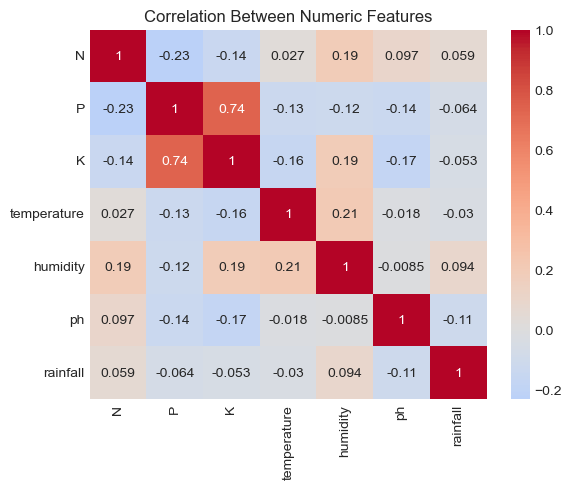

In [15]:
corr = df.corr(numeric_only= True)
sns.heatmap(corr, annot= True,cmap='coolwarm', center= 0)

plt.title("Correlation Between Numeric Features")


In [16]:
from sklearn.feature_selection import f_classif

X = df[features]
y = df['label']

F_values, p_values = f_classif(X, y)
anova_results = pd.DataFrame({'Feature': X.columns, 'F_score': F_values, 'p_value': p_values})
anova_results = anova_results.sort_values(by='F_score', ascending=False)
print(anova_results)


       Feature       F_score        p_value
2            K  27238.362067   0.000000e+00
4     humidity   3103.708891   0.000000e+00
1            P   1885.657859   0.000000e+00
0            N    897.568186   0.000000e+00
6     rainfall    605.527966   0.000000e+00
3  temperature    102.186981  4.019324e-305
5           ph     60.344034  6.493162e-199


In [17]:
corr

,N,P,K,temperature,humidity,ph,rainfall
N,1.000000,-0.231460,-0.140512,0.026504,0.190688,0.096683,0.059020
P,-0.231460,1.000000,0.736232,-0.127541,-0.118734,-0.138019,-0.063839
K,-0.140512,0.736232,1.000000,-0.160387,0.190859,-0.169503,-0.053461
temperature,0.026504,-0.127541,-0.160387,1.000000,0.205320,-0.017795,-0.030084
humidity,0.190688,-0.118734,0.190859,0.205320,1.000000,-0.008483,0.094423
ph,0.096683,-0.138019,-0.169503,-0.017795,-0.008483,1.000000,-0.109069
rainfall,0.059020,-0.063839,-0.053461,-0.030084,0.094423,-0.109069,1.000000


In [18]:
df.groupby('label')[features].mean()

,N,P,K,temperature,humidity,ph,rainfall
label,,,,,,,
apple,20.80,134.22,199.89,22.630942,92.333383,5.929663,112.654779
banana,100.23,82.01,50.05,27.376798,80.358123,5.983893,104.626980
blackgram,40.02,67.47,19.24,29.973340,65.118426,7.133952,67.884151
chickpea,40.09,67.79,79.92,18.872847,16.860439,7.336957,80.058977
coconut,21.98,16.93,30.59,27.409892,94.844272,5.976562,175.686646
coffee,101.20,28.74,29.94,25.540477,58.869846,6.790308,158.066295
cotton,117.77,46.24,19.56,23.988958,79.843474,6.912675,80.398043
grapes,23.18,132.53,200.11,23.849575,81.875228,6.025937,69.611829
jute,78.40,46.86,39.99,24.958376,79.639864,6.732778,174.792798


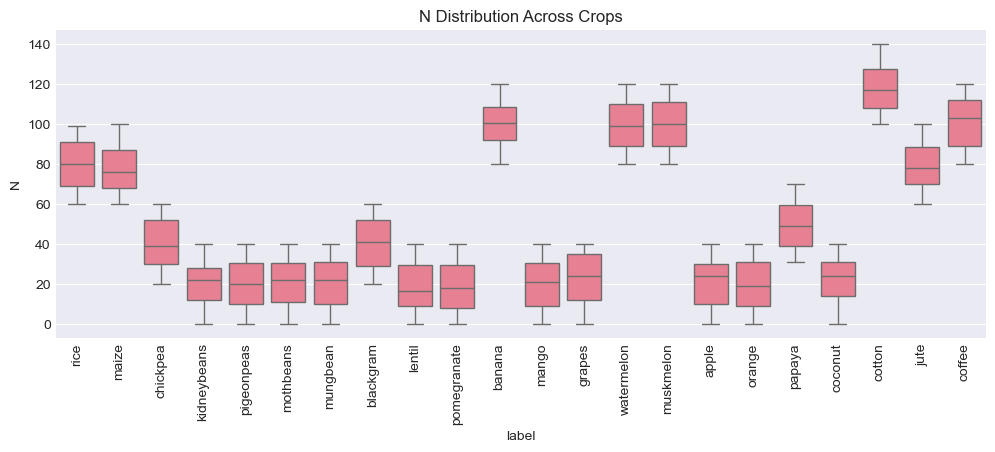

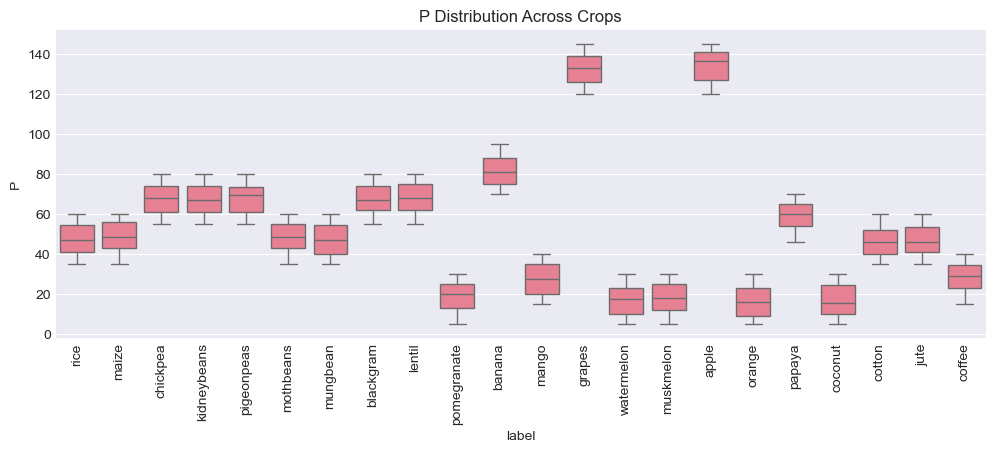

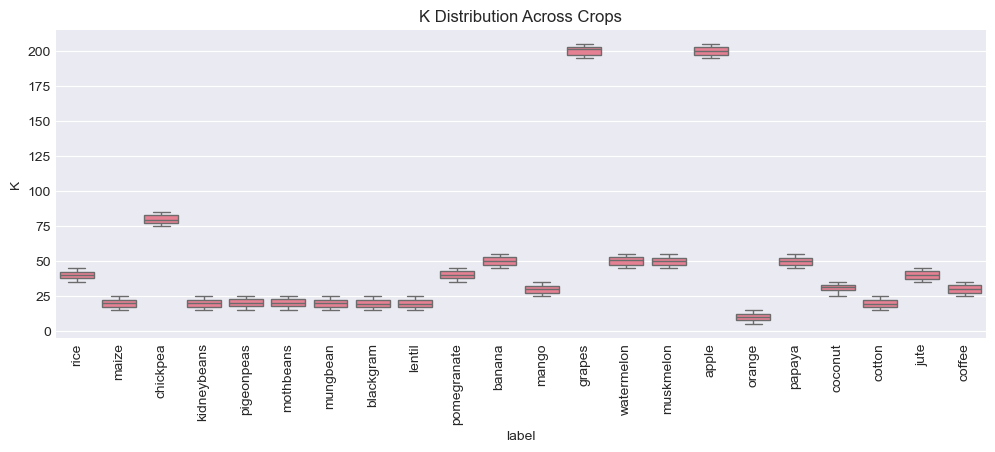

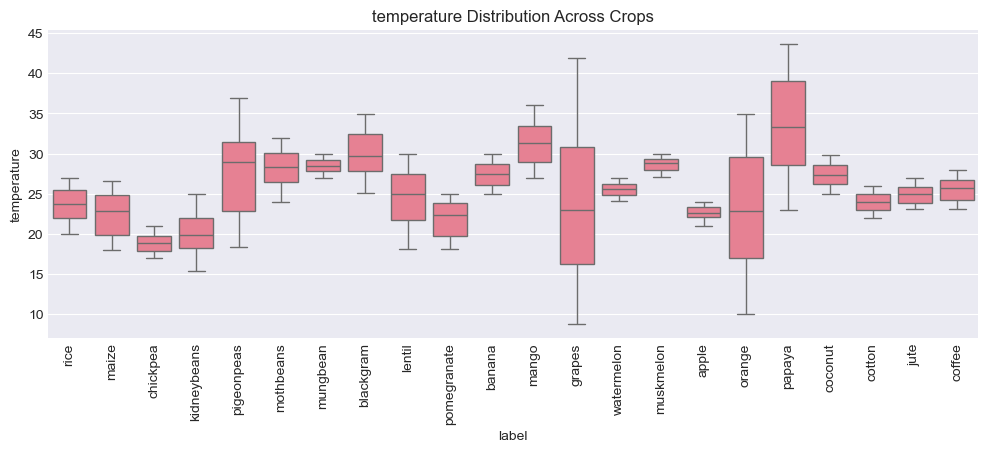

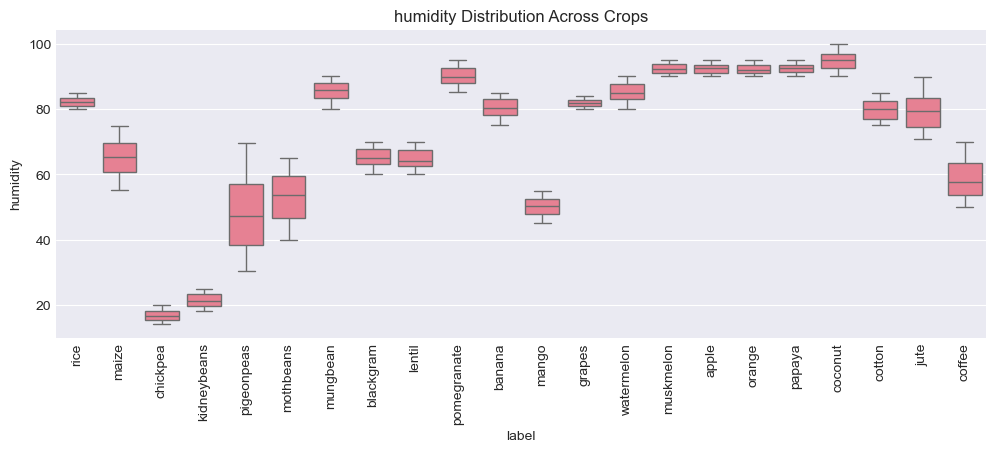

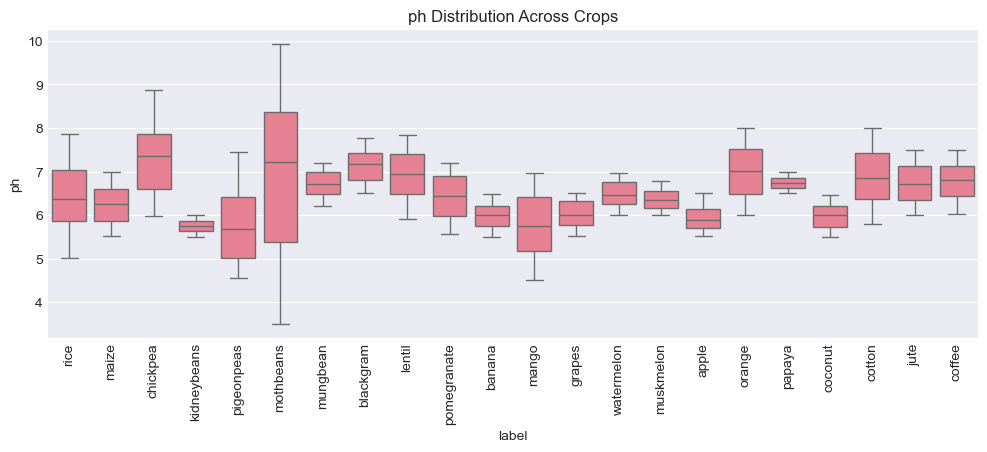

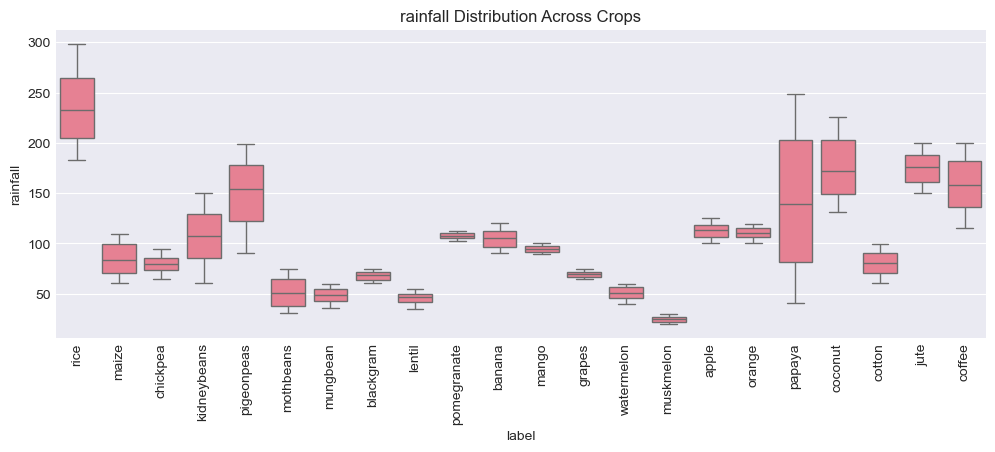

In [19]:
for col in features:
    plt.figure(figsize=(12,4))
    sns.boxplot(x='label', y=col, data=df)
    plt.xticks(rotation=90)
    plt.title(f'{col} Distribution Across Crops')
    plt.show()

### Multivariate Analysis

In [33]:
imp_features = ['K', 'humidity', 'P', 'N']

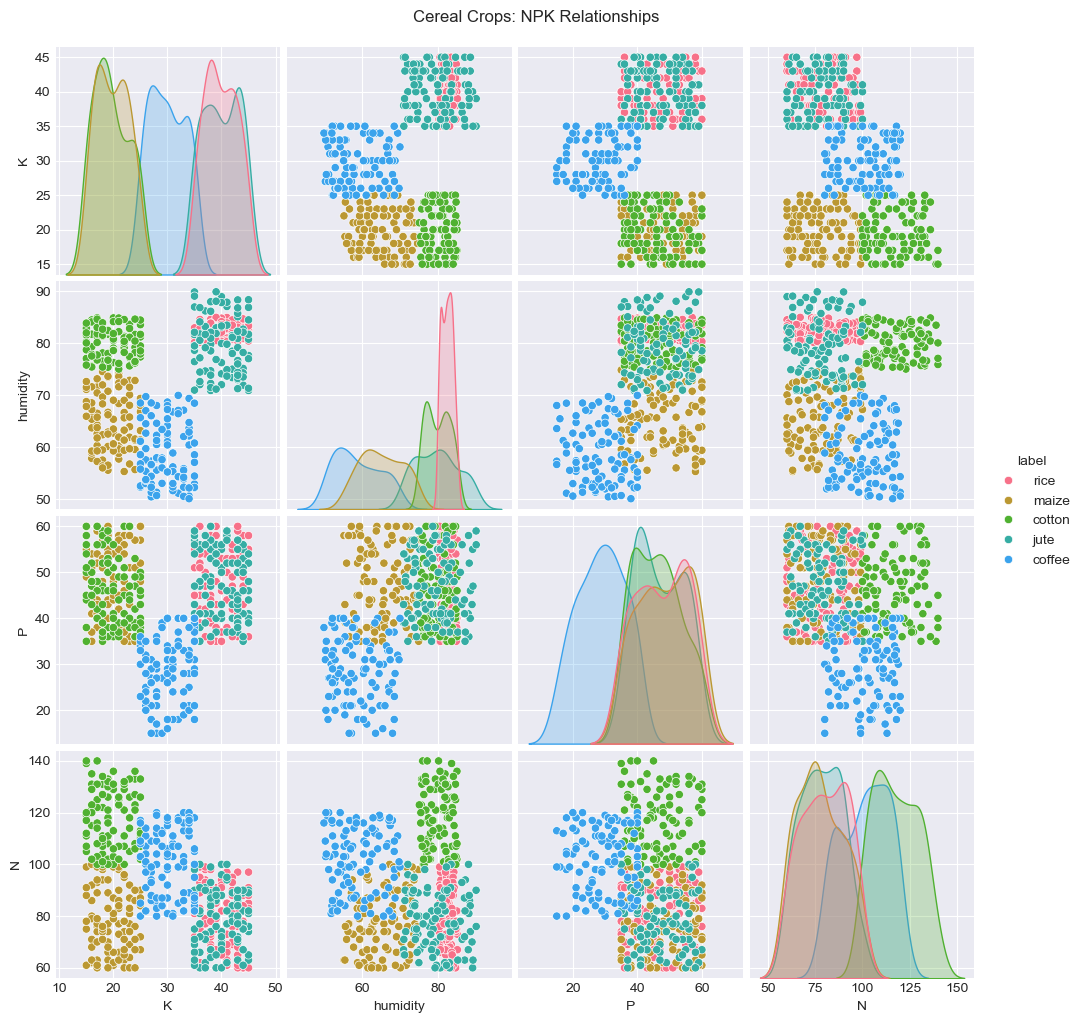

In [38]:
# cereals and cash crops 
cereals = ['rice', 'maize', 'cotton', 'jute', 'coffee']
df_cereals = df[df['label'].isin(cereals)]

sns.pairplot(df_cereals[imp_features+ ['label']], 
             hue='label',
             height=2.5)
plt.suptitle('Cereal Crops: NPK Relationships', y=1.02)
plt.show()

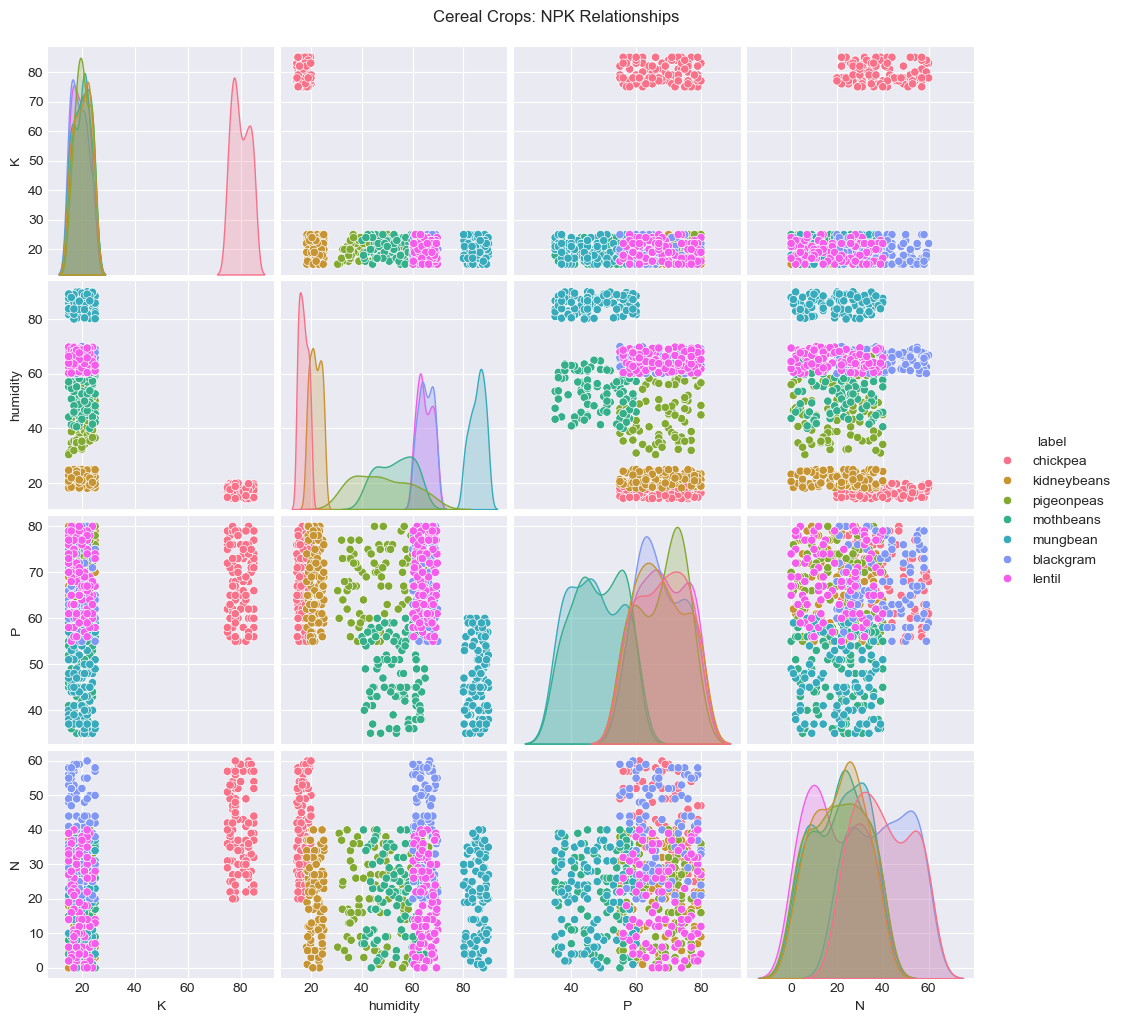

In [40]:
#pulses
pulses = ['chickpea', 'kidneybeans', 'pigeonpeas', 'mothbeans', 'mungbean', 'blackgram', 'lentil']

df_pulses = df[df['label'].isin(pulses)]

sns.pairplot(df_pulses[imp_features+ ['label']], 
             hue='label',
             height=2.5)
plt.suptitle('Cereal Crops: NPK Relationships', y=1.02)
plt.show()

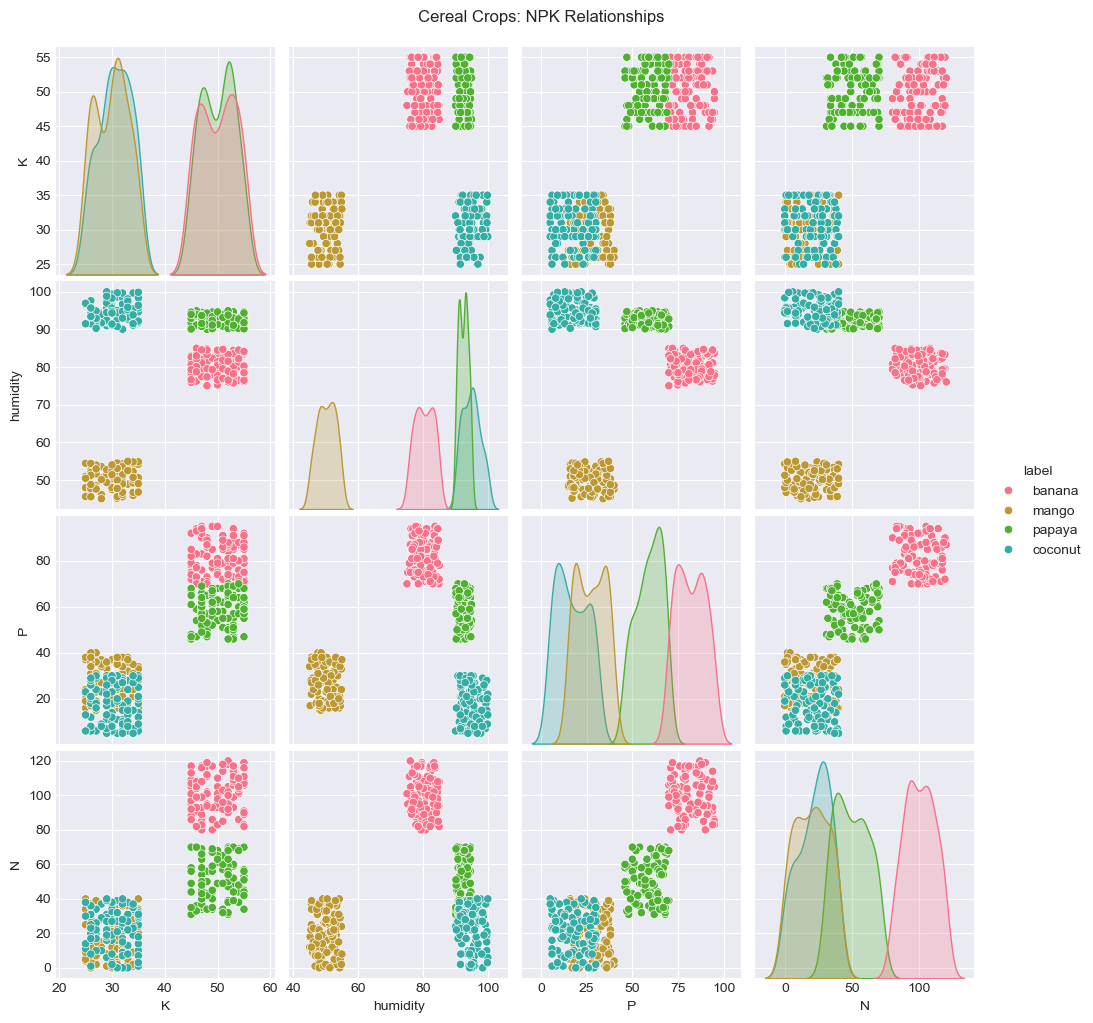

In [41]:
#tropical fruits
tropicals = ['banana', 'mango', 'papaya', 'coconut']

df_tropicals = df[df['label'].isin(tropicals)]

sns.pairplot(df_tropicals[imp_features+ ['label']], 
             hue='label',
             height=2.5)
plt.suptitle('Cereal Crops: NPK Relationships', y=1.02)
plt.show()

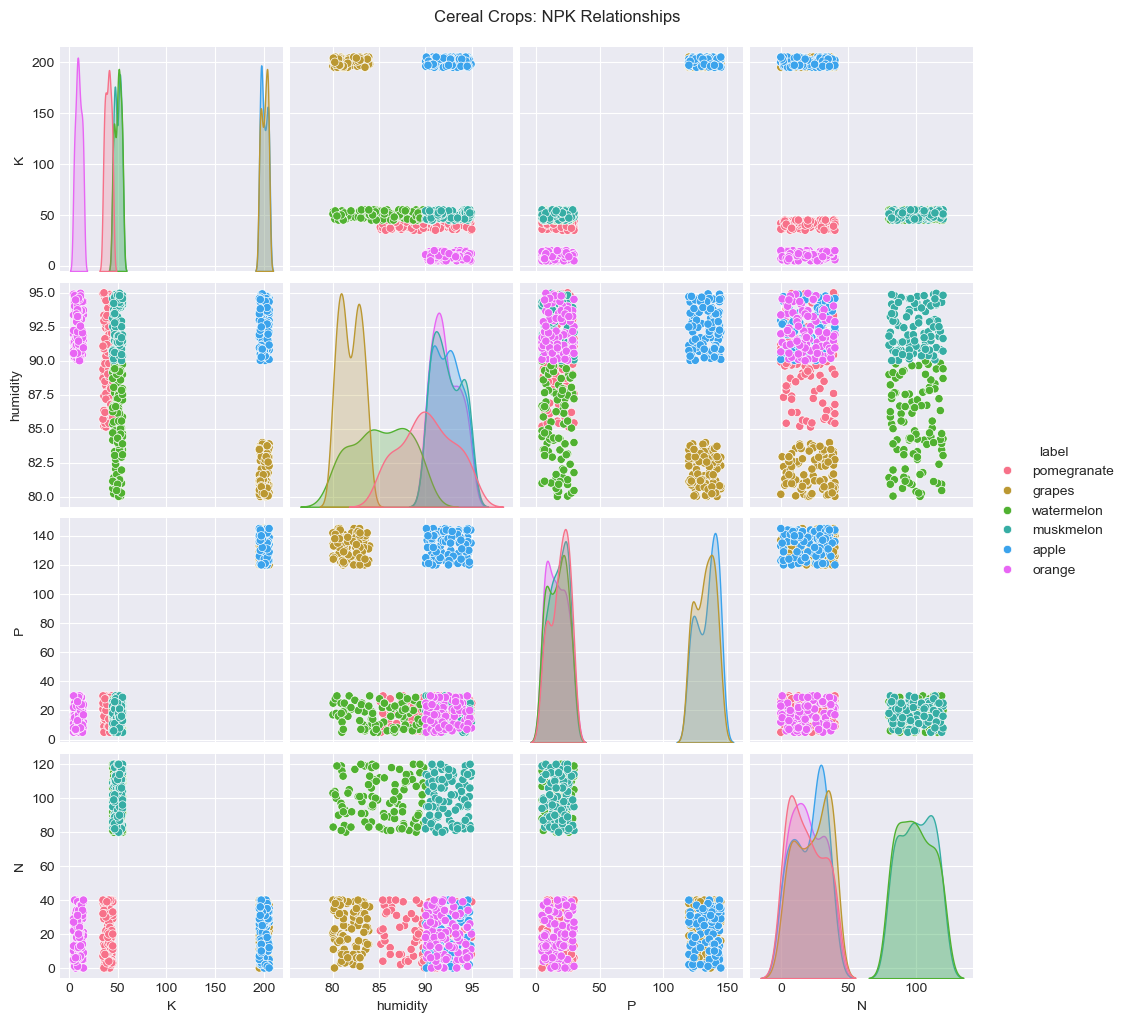

In [44]:
#temperature fruits
temp_fruits = ['pomegranate', 'grapes', 'watermelon', 'muskmelon', 'apple', 'orange']

df_temp_fruits = df[df['label'].isin(temp_fruits)]

sns.pairplot(df_temp_fruits[imp_features+ ['label']], 
             hue='label',
             height=2.5)
plt.suptitle('Cereal Crops: NPK Relationships', y=1.02)
plt.show()

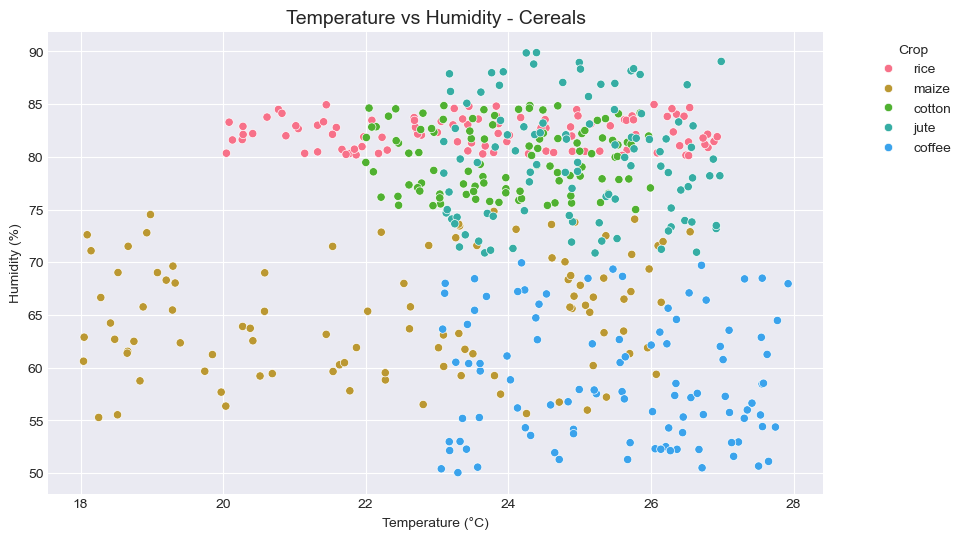

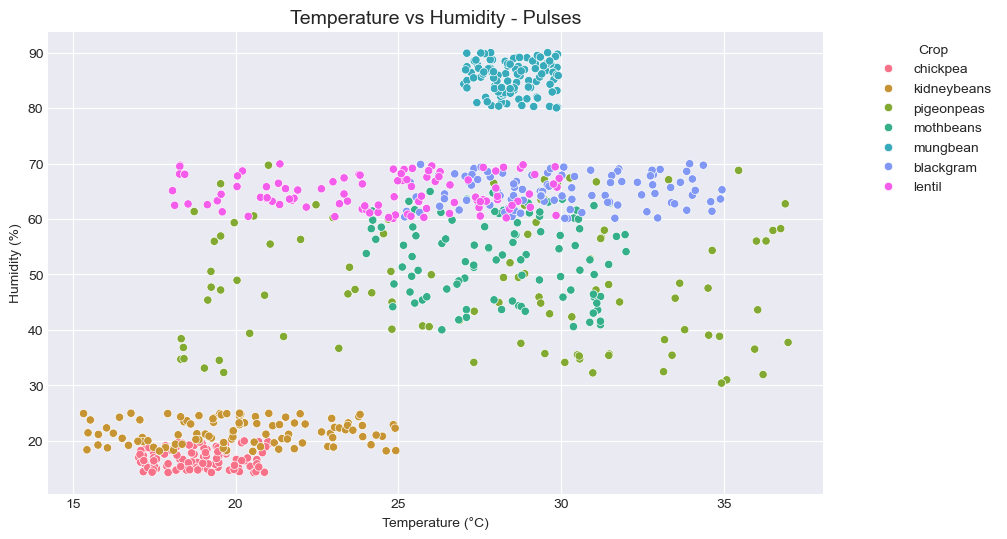

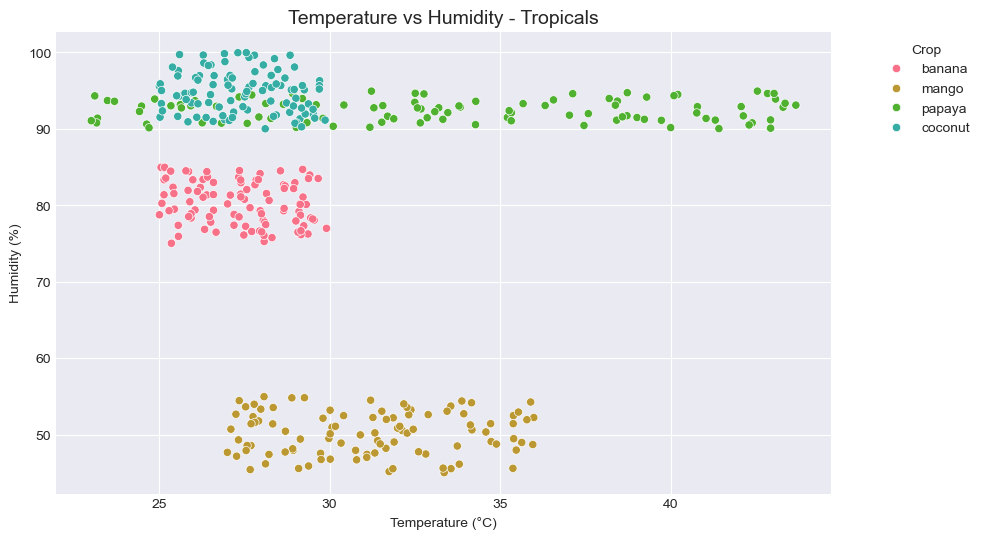

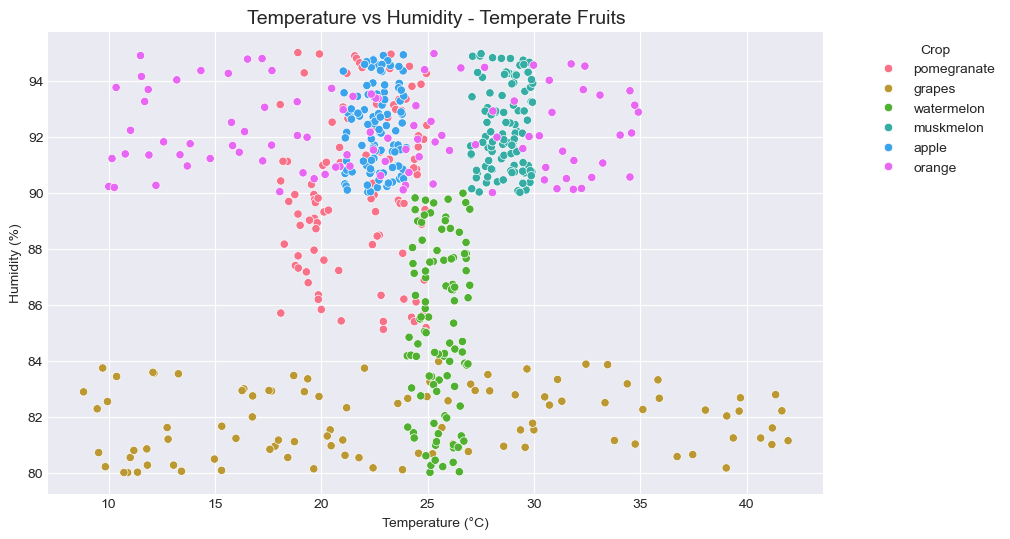

In [50]:
categories = {
    "Cereals": df_cereals,
    "Pulses": df_pulses,
    "Tropicals": df_tropicals,
    "Temperate Fruits": df_temp_fruits
}

for name, cat in categories.items():
    plt.figure(figsize=(10,6))
    sns.scatterplot(data=cat, x='temperature', y='humidity', hue='label')
    plt.title(f'Temperature vs Humidity - {name}', fontsize=14)
    plt.xlabel('Temperature (°C)')
    plt.ylabel('Humidity (%)')
    plt.legend(title='Crop', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()




In [55]:
# Group by crop and calculate mean
crop_group = df.groupby('label').mean()
print("Mean values per crop:")
print(crop_group)


Mean values per crop:
                  N       P       K  temperature   humidity        ph  \
label                                                                   
apple         20.80  134.22  199.89    22.630942  92.333383  5.929663   
banana       100.23   82.01   50.05    27.376798  80.358123  5.983893   
blackgram     40.02   67.47   19.24    29.973340  65.118426  7.133952   
chickpea      40.09   67.79   79.92    18.872847  16.860439  7.336957   
coconut       21.98   16.93   30.59    27.409892  94.844272  5.976562   
coffee       101.20   28.74   29.94    25.540477  58.869846  6.790308   
cotton       117.77   46.24   19.56    23.988958  79.843474  6.912675   
grapes        23.18  132.53  200.11    23.849575  81.875228  6.025937   
jute          78.40   46.86   39.99    24.958376  79.639864  6.732778   
kidneybeans   20.75   67.54   20.05    20.115085  21.605357  5.749411   
lentil        18.77   68.36   19.41    24.509052  64.804785  6.927932   
maize         77.76   48.44  

In [65]:
highest_N_crop = crop_group['N'].sort_values(ascending=False)
highest_rainfall_crop = crop_group['rainfall'].sort_values(ascending=False)
highest_ph_crop = crop_group['ph'].sort_values(ascending=False)

print(f"Crop that need highest N: {highest_N_crop.head(1)}")
print(f"\nCrop that need highest rainfall: {highest_rainfall_crop.head(1)}")
print(f"\nCrop that need highest pH: {highest_ph_crop.head(1)}")

Crop that need highest N: label
cotton    117.77
Name: N, dtype: float64

Crop that need highest rainfall: label
rice    236.181114
Name: rainfall, dtype: float64

Crop that need highest pH: label
chickpea    7.336957
Name: ph, dtype: float64


# Executive Summary - Exploratory Data Analysis

## 1. Dataset Overview
- **Total Samples**: 2,200 observations
- **Features**: 7 numerical features (N, P, K, temperature, humidity, pH, rainfall)
- **Target Variable**: 22 crop types (perfectly balanced with 100 samples each)
- **Data Quality**: No missing values, no duplicates, all values within valid ranges

## 2. Key Statistical Findings

### 2.1 Feature Distributions
- **Nitrogen (N)**: Range 0-140 kg/ha, mean 50.6, moderate positive skew (0.51)
- **Phosphorus (P)**: Range 5-145 kg/ha, mean 53.4, moderate positive skew (1.01)  
- **Potassium (K)**: Range 5-205 kg/ha, mean 48.1, high positive skew (2.37)
- **Temperature**: Range 8.8-43.7°C, mean 25.6, approximately normal (0.18)
- **Humidity**: Range 14.3-100%, mean 71.5, negative skew (-1.09)
- **pH**: Range 3.5-9.9, mean 6.5, approximately normal (0.28)
- **Rainfall**: Range 20-299mm, mean 103.5, moderate positive skew (0.97)

### 2.2 Outlier Analysis
Statistical outliers detected via IQR method: P (138), K (200), temperature (86), humidity (30), pH (57), rainfall (100).

**Decision**: All outliers retained as they represent legitimate extreme agricultural conditions with no physically impossible values.

## 3. Feature Importance Analysis

ANOVA F-test results reveal feature discriminative power:

| Rank | Feature | F-Score | Interpretation |
|------|---------|---------|----------------|
| 1 | K (Potassium) | 27,238 | Extremely high discriminative power |
| 2 | Humidity | 3,104 | Very high discriminative power |
| 3 | P (Phosphorus) | 1,886 | High discriminative power |
| 4 | N (Nitrogen) | 898 | Moderate-high discriminative power |
| 5 | Rainfall | 606 | Moderate discriminative power |
| 6 | Temperature | 102 | Low-moderate discriminative power |
| 7 | pH | 60 | Low discriminative power |

**Key Insight**: Potassium is the dominant feature for crop classification, with 9x higher discriminative power than the next feature.

## 4. Feature Correlation Analysis

### 4.1 Strong Correlations
- **P ↔ K**: 0.74 (strong positive) - Phosphorus and Potassium requirements often align
- **Temperature ↔ Humidity**: 0.21 (weak positive) - warmer climates tend to be more humid

### 4.2 Weak Correlations
All other feature pairs show correlation coefficients < 0.20, indicating:
- **Low multicollinearity** - features provide independent information
- **Good for modeling** - reduces redundancy, improves model stability

## 5. Crop Requirement Patterns

### 5.1 Nutrient Requirements

**High Nitrogen Crops** (N > 95):
- Cotton (118), Coffee (101), Banana (100), Muskmelon (100), Watermelon (99)
- *Interpretation*: Leafy/vegetative growth crops require high nitrogen

**High Potassium Crops** (K > 195):
- Apple (200), Grapes (200)
- *Interpretation*: Fruit-bearing perennials require high potassium for fruit quality

**Moderate NPK Crops**:
- Rice (80, 48, 40) - Balanced nutrient requirements
- Maize (78, 48, 20) - Similar to rice but lower K

**Low Nutrient Crops** (all < 40):
- Chickpea, Kidneybeans, Lentil, Mothbeans, Blackgram
- *Interpretation*: Legumes fix their own nitrogen, need minimal fertilization

### 5.2 Climate Requirements

**High Rainfall Crops** (> 150mm):
- Rice (236), Jute (175), Coconut (176), Coffee (158), Pigeonpeas (149)
- *Interpretation*: Water-intensive crops suited for monsoon regions

**Low Rainfall Crops** (< 70mm):
- Muskmelon (25), Lentil (46), Mungbean (48), Mothbeans (51), Watermelon (51)
- *Interpretation*: Drought-tolerant crops for arid regions

**High Humidity Crops** (> 90%):
- Apple (92%), Coconut (95%), Orange (92%), Papaya (92%), Pomegranate (90%)
- *Interpretation*: Fruits requiring moist atmospheric conditions

**Low Humidity Crops** (< 30%):
- Chickpea (17%), Kidneybeans (22%)
- *Interpretation*: Pulses adapted to dry, continental climates

### 5.3 Soil pH Preferences

**Alkaline-Loving** (pH > 7.0):
- Chickpea (7.3), Blackgram (7.1), Orange (7.0)

**Acidic-Loving** (pH < 6.0):
- Apple (5.9), Banana (6.0), Mango (5.8), Kidneybeans (5.7)

**Neutral pH** (6.0-7.0):
- Majority of crops prefer slightly acidic to neutral soils

## 6. Crop Clustering Patterns

Visual analysis from pairplots reveals distinct crop groupings:

**Cluster 1 - High K Fruits**: Apple, Grapes (K=200, P=130+)

**Cluster 2 - High N Crops**: Cotton, Coffee, Banana, Muskmelon, Watermelon (N=95-120)

**Cluster 3 - Low Humidity Pulses**: Chickpea, Kidneybeans (humidity=15-22%)

**Cluster 4 - High Rainfall Crops**: Rice, Jute, Coconut (rainfall=175-236mm)

**Cluster 5 - Low Nutrient Pulses**: Lentil, Mothbeans, Mungbean, Blackgram (N,P,K all <70)

**Key Finding**: Crops naturally separate into meaningful agricultural categories based on their requirements.

## 7. Model Readiness Assessment

✅ **Dataset is model-ready with minimal preprocessing required**

**Strengths**:
- Clean data with no quality issues
- Perfectly balanced classes (no class imbalance)
- Clear feature-target relationships
- Strong discriminative features (especially K)
- Natural crop clustering suggests good separability

**Preprocessing Requirements**:
- Feature scaling (StandardScaler recommended for tree ensemble models)
- Train-test-validation split with stratification
- No outlier removal needed
- No feature engineering initially required (can experiment later)

**Model Recommendations**:
1. **Primary**: Random Forest / XGBoost (handles non-linear relationships, robust to outliers)
2. **Secondary**: SVM / Logistic Regression (for comparison, requires scaling)
3. **Avoid**: Simple linear models (relationships are non-linear)

## 8. Business Insights

### For Agricultural Planning:
- **Soil testing priority**: Focus on K measurement - most critical for crop selection
- **Regional specialization**: Distinct crop requirements enable region-specific recommendations
- **Fertilizer optimization**: Clear NPK patterns enable targeted fertilizer recommendations

### For Model Deployment:
- High feature importance concentration (K dominates) suggests:
  - Model will be robust even with some missing features
  - Feature collection can be prioritized (K measurement is critical)
  - Simpler models may perform well due to clear patterns

## 9. Next Steps

1. **Data Preprocessing**: 
   - Split dataset (70% train, 15% validation, 15% test) with stratification
   - Apply StandardScaler to numerical features
   - Save processed data for modeling

2. **Model Development**:
   - Start with Random Forest (baseline)
   - Experiment with XGBoost, SVM
   - Optimize hyperparameters
   - Compare performance metrics

3. **Feature Engineering** (if needed):
   - NPK ratios (N/P, N/K, P/K)
   - Climate zones (temperature-humidity combinations)
   - Only if baseline models underperform
